In [60]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
df = pd.read_csv(r'C:\Users\One\Git\coursera_introduction\week5\abalone.csv')

In [61]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
y = df['Rings']
X = df.drop('Rings', axis = 1)

In [63]:
cvk = KFold(n_splits=5,random_state=1, shuffle=True)

In [73]:
scores = []
for n in range(1, 51):
    rfc = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    score = abs(cross_val_score(rfc, X, y, cv=cvk, scoring="r2").mean())
    scores.append(score)

In [78]:
for n, score in enumerate(scores):
    if round(score, 2) > 0.52:
        print(n+1, round(score,2))
        break

28 0.53


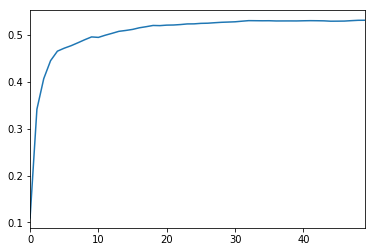

In [68]:
pd.Series(scores).plot()